In [ ]:
# %pip install seaborn
# %pip install matplotlib

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/a6/da/948a017c3ea13fd4a97afad5fdebe2f5bbc4d28c0654510ce6fd6b06b7bd/matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5e/fe/4029038b4e1c4485cef18e480b0e2cd2d755448bb071eb9977caac80b77b/contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt


In [2]:
# Load Dataset
df = pd.read_csv('../Data Collection/Datasets/batdongsan.com/raw_batdongsan/unique_batdongsan.csv')  # Replace with your actual file path

# Basic Information
print("Shape of DataFrame:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nInfo:")
df.info()
print("\nData Types:")
print(df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

Shape of DataFrame: (10481, 18)

First 5 rows:
  Diện tích Hướng ban công   Hướng nhà Mặt tiền     Mức giá Mức giá internet  \
0    107 m²            NaN         NaN      NaN  Thỏa thuận              NaN   
1     65 m²            NaN         NaN      NaN      3,4 tỷ              NaN   
2     50 m²            NaN         Bắc      4 m     6,55 tỷ              NaN   
3    150 m²            NaN  Đông - Nam      5 m     7,99 tỷ              NaN   
4     62 m²            NaN         NaN      NaN     1,99 tỷ              NaN   

  Mức giá nước Mức giá điện Nội thất           Pháp lý Số phòng ngủ  \
0          NaN          NaN      NaN    Sổ đỏ/ Sổ hồng      3 phòng   
1          NaN          NaN   Đầy đủ    Sổ đỏ/ Sổ hồng      2 phòng   
2          NaN          NaN      NaN    Sổ đỏ/ Sổ hồng          NaN   
3          NaN          NaN   Đầy đủ    Sổ đỏ/ Sổ hồng      2 phòng   
4          NaN          NaN      NaN  Hợp đồng mua bán      2 phòng   

  Số phòng tắm, vệ sinh Số tầng Thời gian dự 

Missing values per column:
 Diện tích                      1
Hướng ban công              8508
Hướng nhà                   7121
Mặt tiền                    5389
Mức giá                        1
Mức giá internet           10334
Mức giá nước               10249
Mức giá điện               10235
Nội thất                    5717
Pháp lý                     2374
Số phòng ngủ                4443
Số phòng tắm, vệ sinh       4578
Số tầng                     6648
Thời gian dự kiến vào ở    10196
Tiện ích                   10315
title                          1
url                            1
Đường vào                   6142
dtype: int64

Percentage of missing values per column:
 Diện tích                   0.009541
Hướng ban công             81.175460
Hướng nhà                  67.941990
Mặt tiền                   51.416850
Mức giá                     0.009541
Mức giá internet           98.597462
Mức giá nước               97.786471
Mức giá điện               97.652896
Nội thất                  

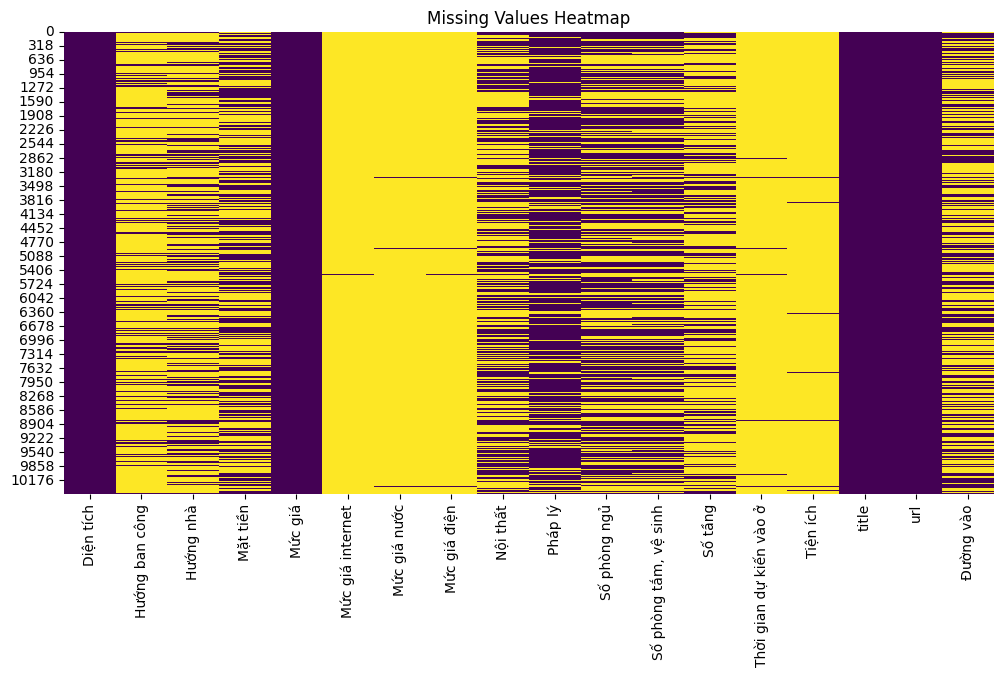


Total fully duplicated rows: 0


In [ ]:


# 1. Identify and Handle Missing Values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
print("Missing values per column:\n", missing_count)
print("\nPercentage of missing values per column:\n", missing_percent)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 2. Handle Duplicates
total_duplicates = df.duplicated().sum()
print(f"\nTotal fully duplicated rows: {total_duplicates}")

key_columns = ['title', 'URL'] if all(col in df.columns for col in ['title', 'URL']) else None
if key_columns:
    key_duplicates = df.duplicated(subset=key_columns).sum()
    print(f"Duplicates based on {key_columns}: {key_duplicates}")

# Example: Check duplicates based on address, area, price (replace with actual column names)
subset_columns = ['Diện tích', 'Mức giá']
subset_columns = [col for col in subset_columns if col in df.columns]
if subset_columns:
    subset_duplicates = df.duplicated(subset=subset_columns).sum()
    print(f"Duplicates based on {subset_columns}: {subset_duplicates}")

# 3. Data Type Conversion (example: adjust column names as needed)
for col in ['Mức giá', 'Diện tích', 'Số phòng ngủ', 'Số phòng tắm']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('VND', '').str.replace('m²', '').str.replace(',', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert date columns to datetime
for date_col in ['Ngày đăng', 'Ngày hết hạn']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 4. Initial Feature Engineering (examples)
# Extract numerical values from text columns if needed

def extract_number(text):
    if pd.isnull(text):
        return np.nan
    numbers = re.findall(r"[\d,.]+", str(text).replace(',', ''))
    return float(numbers[0]) if numbers else np.nan

for col in ['Mức giá', 'Diện tích']:
    if col in df.columns and df[col].dtype == object:
        df[col + '_num'] = df[col].apply(extract_number)

# (Further feature engineering can be added as needed)